# Iris Flower Classfication

# 1. Load Dataset

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('IRIS.csv')

In [4]:
# Display the first few rows of the dataset
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


# 2. Exploratory Data Analysis (EDA)

* Check for any missing values and get summary statistics.

In [5]:
# Check for missing values
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [6]:
# Get summary statistics
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:
# Display the unique species
print(df['species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# 3. Data Preprocessing

* Encode the target labels and scale the features.

In [8]:
# Separate features and target
X = df.drop('species', axis=1)
y = df['species']


In [9]:
# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [10]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-Test Split

* Split the data into training and testing sets.

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# 5. Model Training

* Train a logistic regression model.

In [12]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

# 6. Model Evaluation

In [13]:
# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation Metrics
def evaluate_model(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)
    
    return precision, recall, f1, conf_matrix, class_report

# Evaluate Logistic Regression
precision_log_reg, recall_log_reg, f1_log_reg, conf_matrix_log_reg, class_report_log_reg = evaluate_model(y_test, y_pred_log_reg)

# Print results
print("Logistic Regression Evaluation Metrics:")
print(f"Precision: {precision_log_reg}")
print(f"Recall: {recall_log_reg}")
print(f"F1 Score: {f1_log_reg}")
print("Confusion Matrix:")
print(conf_matrix_log_reg)
print("Classification Report:")
print(class_report_log_reg)

Logistic Regression Evaluation Metrics:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
all_vars = df.columns
output_var_name = "species"
features = all_vars.drop(output_var_name).to_list()

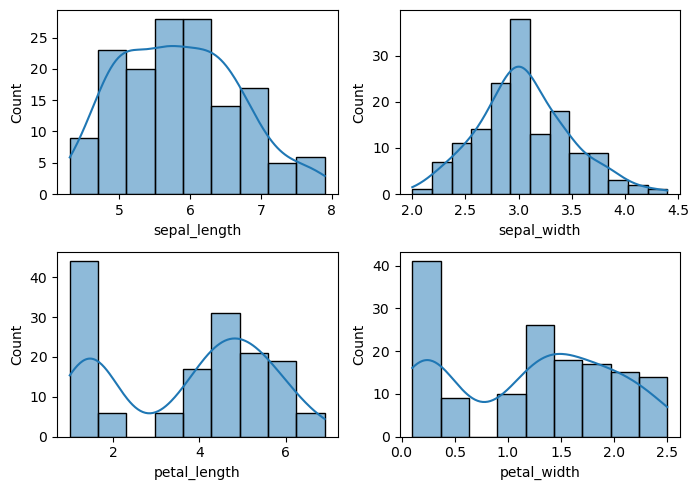

In [16]:
plt.figure(figsize=(7, 5))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)
plt.tight_layout()
plt.show()

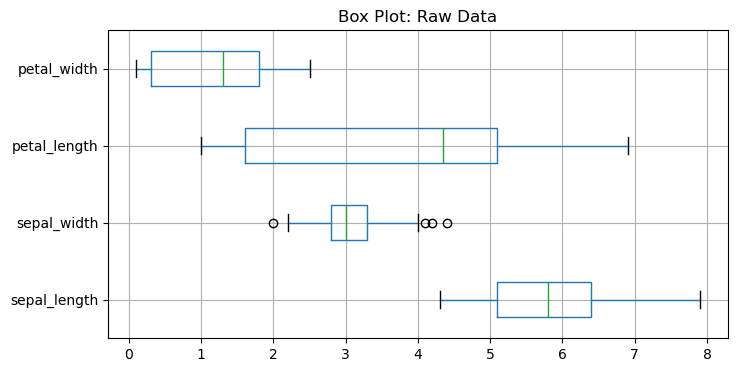

In [17]:
fig, ax = plt.subplots(figsize=(8, 4))
boxplot = df.boxplot(vert = 0, ax=ax)  
_ = ax.set_title(f'Box Plot: Raw Data')

# PairPlot

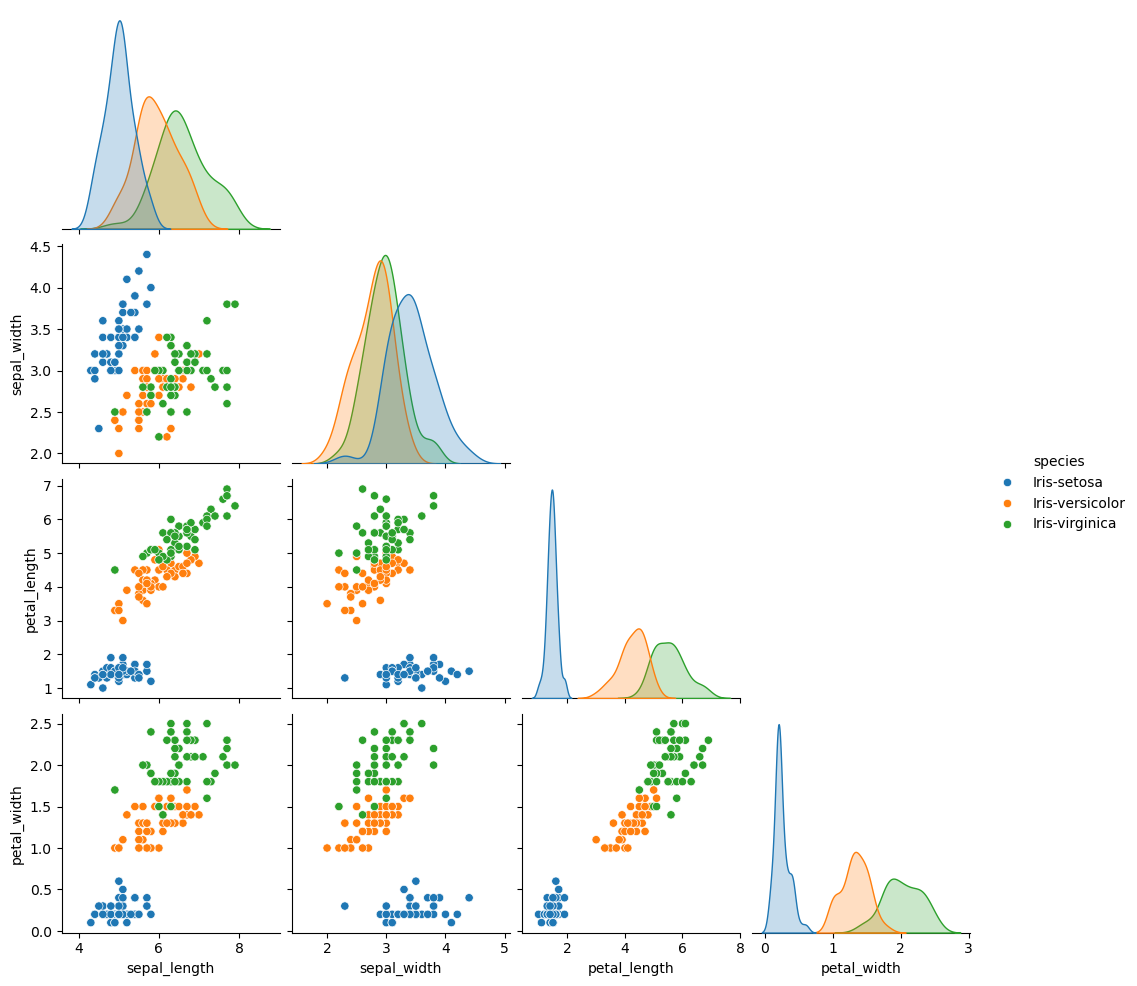

In [18]:
_ = sns.pairplot(data = df, hue="species",corner = True)

# Model

In [19]:
X = df[features]
y = df[output_var_name]
display(X.head(), y.head())

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
display(X_train)

sepal_length  sepal_width  petal_length  petal_width
40            5.0          3.5           1.3          0.3
115           6.4          3.2           5.3          2.3
142           5.8          2.7           5.1          1.9
69            5.6          2.5           3.9          1.1
17            5.1          3.5           1.4          0.3
..            ...          ...           ...          ...
8             4.4          2.9           1.4          0.2
73            6.1          2.8           4.7          1.2
144           6.7          3.3           5.7          2.5
118           7.7          2.6           6.9          2.3
99            5.7          2.8           4.1          1.3

[112 rows x 4 columns]

# Fitt KNN Model

In [23]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

# The Confusion Matrix 
  # Test Data

In [26]:
cm_test = confusion_matrix(y_test, y_test_pred)
print(cm_test)
_ = sns.heatmap(cm_test/np.sum(cm_test), annot=True,cmap='Blues', fmt='.2%')

[[12  0  0]
 [ 0 12  2]
 [ 0  0 12]]


# Different Value of K

In [29]:
kmin = 3
kmax = 15
kn = np.arange(kmin, kmax+1)
mean_acc = np.zeros(len(kn))
std_acc = np.zeros(len(kn))
error_rate = np.zeros(len(kn))


for n, k in enumerate(kn):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    ypred = knn.predict(X_test)
    
    mean_acc[n] = accuracy_score(y_test, ypred)    
    std_acc[n]=np.std(ypred==y_test)/np.sqrt(ypred.shape[0])
    error_rate[n] = np.mean(ypred != y_test)
    # print(f'[{n}] {k} Accuracy: {mean_acc[n]} ')

print( "The best accuracy was with", mean_acc.max(), "with k=", kn[mean_acc.argmax()])

The best accuracy was with 1.0 with k= 8


In [30]:
plt.figure(figsize=(8,5))
plt.plot(kn, mean_acc,'g')
plt.fill_between(kn, mean_acc - 1*std_acc, mean_acc + 1*std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (k)')
plt.tight_layout()
plt.grid()
plt.show()

Minimum error:  0.0 at k = 8


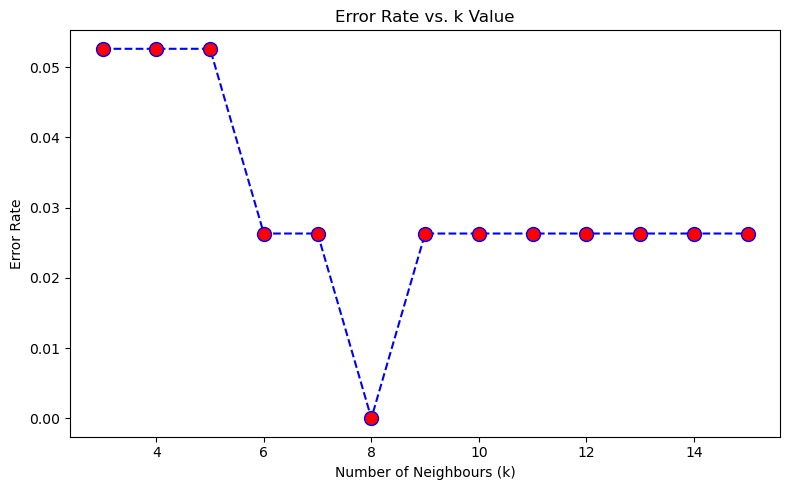

In [31]:
plt.figure(figsize=(8,5))
plt.plot(kn,error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. k Value')
plt.xlabel('Number of Neighbours (k)')
plt.ylabel('Error Rate')
plt.tight_layout()
print("Minimum error: ",min(error_rate),"at k =", kn[list(error_rate).index(min(error_rate))])